<a href="https://colab.research.google.com/github/neerajguleria1/driver-drowsiness-detection/blob/main/Day21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Speed  Alertness  Seatbelt  Drowsy
0    120        0.4         1       0
1     40        0.6         0       0
2    150        0.7         1       1
3    220        0.3         1       1
4     89        0.5         0       1
5    240        0.3         1       0


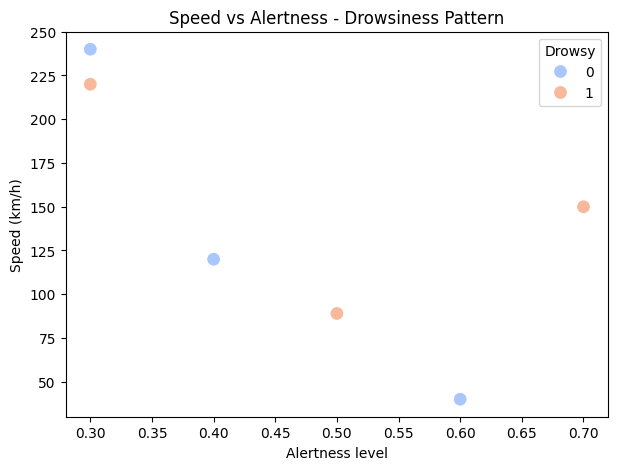

Training samples: 4
Testing samples: 2
Predictions: [1, 1]
Model Accuracy: 0.0 %


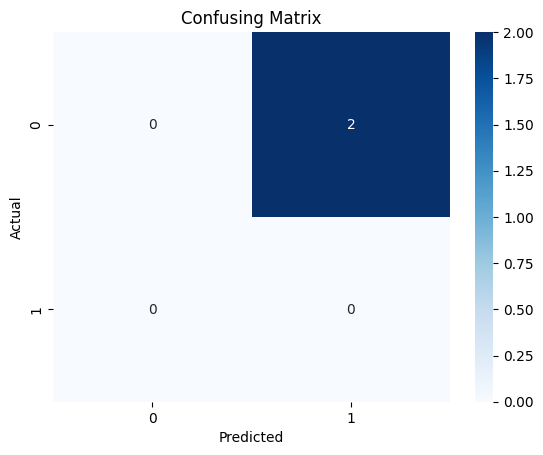


 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

prediceted Class: Alert


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [16]:
# ML Starting(Basics)
''' pandas and numpy for handle data
seaborn and matplotlib visualize pattern
sklearn used for ml training, evaluation and metrics'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Divides data into for training & testing
from sklearn.linear_model import LogisticRegression # Builds for classification model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report # measure model performance

# Now we create simulated driver dataset

data={
    'Speed':[120,40,150,220,89,240],
    'Alertness':[0.4,0.6,0.7,0.3,0.5,0.3],
    'Seatbelt':[1,0,1,1,0,1],
    'Drowsy':[0,0,1,1,1,0]
}
df=pd.DataFrame(data)
print(df)

# Now we visualize the relationship
'''it is important before training always we have to see our data
in this we use scatterplot for basically display the data in dots'''
plt.figure(figsize=(7,5))
sns.scatterplot(x='Alertness',y='Speed',hue='Drowsy',data=df,s=100,palette='coolwarm')
plt.title("Speed vs Alertness - Drowsiness Pattern")
plt.xlabel("Alertness level")
plt.ylabel("Speed (km/h)")
plt.show()

# Now we Split Dataset for Training
X=df[['Speed','Alertness','Seatbelt']]
y=df['Drowsy']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print("Training samples:",len(X_train))
print("Testing samples:",len(X_test))

# Now we training Logistic Regression Model
model=LogisticRegression()
model.fit(X_train,y_train)

# Now we Make Predictions
y_pred=model.predict(X_test)
print("Predictions:",y_pred.tolist())

# Now we check Accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Model Accuracy:",round(accuracy*100,2),"%")

# Confusin Matrix & Report
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusing Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\n Classification Report:\n",classification_report(y_test,y_pred))

# Predict New Data
new_driver=pd.DataFrame({
    'Speed':[340],
    'Alertness':[0.8],
    'Seatbelt':[1]
})
prediction=model.predict(new_driver)[0]
print("prediceted Class:","Drowsy" if prediction==1 else "Alert")